In [107]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')
%matplotlib inline
df=pd.read_csv(f'../data/raw/diamonds_train.csv')

In [108]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 9.5 MB


In [109]:
df['cut'] = df['cut'].astype('category')
df['color'] = df['color'].astype('category')
df['clarity'] = df['clarity'].astype('category')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    40455 non-null  float64 
 1   cut      40455 non-null  category
 2   color    40455 non-null  category
 3   clarity  40455 non-null  category
 4   depth    40455 non-null  float64 
 5   table    40455 non-null  float64 
 6   price    40455 non-null  int64   
 7   x        40455 non-null  float64 
 8   y        40455 non-null  float64 
 9   z        40455 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 2.3 MB


In [110]:
df['cut_int']=''

df.loc[df['cut']=='Fair','cut_int']=1

df.loc[df['cut']=='Good','cut_int']=2

df.loc[df['cut']=='Very Good','cut_int']=3

df.loc[df['cut']=='Premium','cut_int']=4

df.loc[df['cut']=='Ideal','cut_int']=5

df['cut_int'] = df['cut_int'].astype('int64')

df['color_int']=''

df.loc[df['color']=='J','color_int']=1
df.loc[df['color']=='I','color_int']=2
df.loc[df['color']=='H','color_int']=3
df.loc[df['color']=='G','color_int']=4
df.loc[df['color']=='F','color_int']=5
df.loc[df['color']=='E','color_int']=6
df.loc[df['color']=='D','color_int']=7


df['color_int'] = df['color_int'].astype('int64')

df['clarity_int']=''

df.loc[df['clarity']=='I1','clarity_int']=1
df.loc[df['clarity']=='SI2','clarity_int']=2
df.loc[df['clarity']=='SI1','clarity_int']=3
df.loc[df['clarity']=='VS2','clarity_int']=4
df.loc[df['clarity']=='VS1','clarity_int']=5
df.loc[df['clarity']=='VVS2','clarity_int']=6
df.loc[df['clarity']=='VVS1','clarity_int']=7
df.loc[df['clarity']=='IF','clarity_int']=8


df['clarity_int'] = df['clarity_int'].astype('int64')

In [111]:
df['cut_color_clarity_score'] = df.apply(lambda new: 3*new['cut_int']+3*new['color_int']+4*new['clarity_int'], axis=1)

In [112]:
df['raw_density'] = (df['carat']*0.2)/(df['x']*df['y']*df['z']/3/1000)

In [113]:
def marketing_carat(x):
    h=0.05
    for z in range(1,6):
        if (z-h)<=x<(z):
            y='bad'
            break
        elif (z)<=x<(z+h):
            y='good'
            break
        else:
            y='regular'
    return y

df['marketing_carat']=df.apply(lambda x: marketing_carat(x['carat']), axis=1) 
    
    



## PRUEBAS FILAS

In [114]:

# df=df.drop_duplicates(subset=df.columns, keep='first')

In [115]:
# filter_xyz=(df['x']<0.2) | (df['y']<0.2) | (df['z']<0.2)
# df=df.loc[~filter_xyz].reset_index()
# df=df.drop(columns=['index'],axis=1)

In [116]:
# df['depth_calc'] = df['z'] / ((df['x'] + df['y'])/2)*100
# df['rest']=df['depth_calc'] - df['depth'] 

# filter_rest=(df['rest']<-1) | (df['rest']>1)
# df=df.loc[~filter_rest].reset_index()
# df=df.drop(columns=['index','depth_calc','rest'],axis=1)






In [117]:


df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,color_int,clarity_int,cut_color_clarity_score,raw_density,marketing_carat
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,4,1,4,31,3.683471,regular
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,3,3,4,34,3.664419,regular
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,1,4,5,35,3.755392,regular
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,2,7,3,39,3.712154,regular
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,5,4,3,39,3.633558,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40287,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43,5,4,5,47,3.630959,regular
40288,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73,2,5,2,29,3.737546,good
40289,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01,5,3,3,36,3.695335,good
40290,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76,5,1,5,38,3.606522,regular


In [118]:
# # Data wrangling:
# X = training_df.drop(columns=['price','x','y','z'])
# y = training_df['price']

# # Scale features using statistics that are robust to outliers:
# rs = RobustScaler() 
# X_scaled = rs.fit_transform(Xclean)

# # Split data:
# X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,y,train_size=0.2)

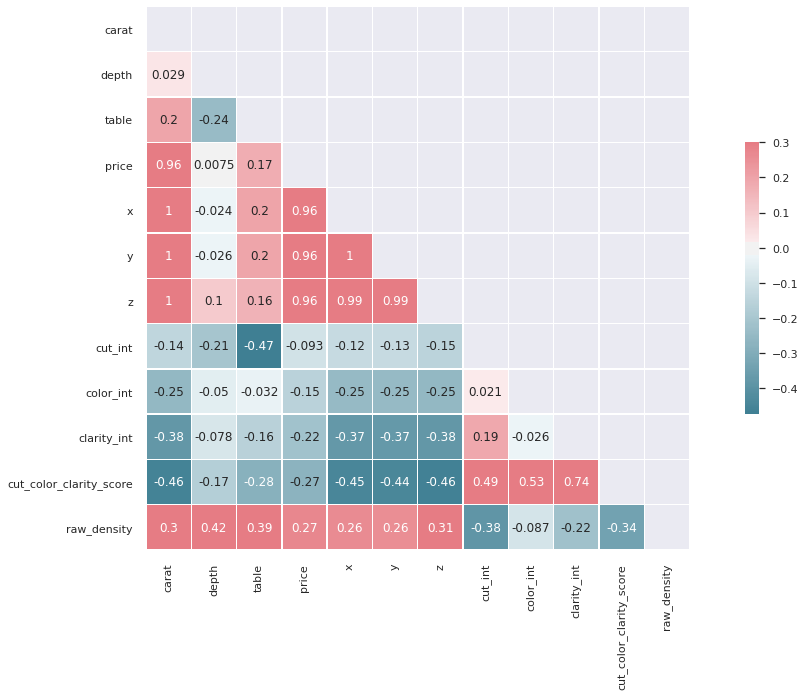

In [119]:

sns.set(font_scale=1)
dft=df.corr(method='spearman')
mask = np.triu(np.ones_like(dft, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dft, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [120]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,color_int,clarity_int,cut_color_clarity_score,raw_density,marketing_carat
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,4,1,4,31,3.683471,regular
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,3,3,4,34,3.664419,regular
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,1,4,5,35,3.755392,regular
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,2,7,3,39,3.712154,regular
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,5,4,3,39,3.633558,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40287,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43,5,4,5,47,3.630959,regular
40288,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73,2,5,2,29,3.737546,good
40289,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01,5,3,3,36,3.695335,good
40290,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76,5,1,5,38,3.606522,regular


In [121]:
pd.set_option('display.max_columns', None)
dfd=pd.get_dummies(df)


dfd.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_int',
       'color_int', 'clarity_int', 'cut_color_clarity_score', 'raw_density',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2',
       'marketing_carat_bad', 'marketing_carat_good',
       'marketing_carat_regular'],
      dtype='object')

In [122]:
#option 1

# dfd=dfd.drop(columns=['price', 'cut_int','color_int', 'clarity_int'])

# #option 2
# dfd=dfd.drop(columns=['price', 'cut_int','color_int', 'clarity_int',
#                      'cut_color_clarity_score'])

# #option 3 espero que sea la mejor
dfd=dfd.drop(columns=['price', 'cut_int','color_int', 'clarity_int',
                     'cut_color_clarity_score','x', 'y', 'z'])

# #option 3 bis espero que sea la mejor
# dfd=dfd.drop(columns=['price', 'cut_int','color_int', 'clarity_int',
#                      'cut_color_clarity_score','raw_density'])

# #option 3 bis2 espero que sea la mejor
# dfd=dfd.drop(columns=['price', 'cut_int','color_int', 'clarity_int',
#                      'x', 'y', 'z'])

# #option 4
# dfd=dfd.drop(columns=['price', 'cut_int','color_int', 'clarity_int',
#                      'cut_color_clarity_score','x', 'y', 'z','raw_density'])




In [123]:
dfd

,carat,depth,table,raw_density,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,marketing_carat_bad,marketing_carat_good,marketing_carat_regular
0,1.21,62.4,58.0,3.683471,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,0.32,63.0,57.0,3.664419,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.71,65.5,55.0,3.755392,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0.41,63.8,56.0,3.712154,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1.02,60.5,59.0,3.633558,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40287,1.34,62.7,57.0,3.630959,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
40288,2.02,57.1,60.0,3.737546,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
40289,1.01,62.7,56.0,3.695335,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
40290,0.33,61.9,54.3,3.606522,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [124]:
# for feature_name in ['carat' ,	'depth','table','x','y','z'] :
#   mean = train[feature_name].mean()
#   std = train[feature_name].std()
#   train[feature_name] = (train[feature_name] - mean) / (std)
#   test[feature_name] = (test[feature_name] - mean) / (std)

not_standard=['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2',
       'marketing_carat_bad', 'marketing_carat_good',
       'marketing_carat_regular']

yes_standard=[x for x in dfd.columns if x not in not_standard]

for x in yes_standard:
    mean = dfd[x].mean()
    std = dfd[x].std()
    dfd[x] = (dfd[x] - mean) / (std)

dfd.describe()

,carat,depth,table,raw_density,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,marketing_carat_bad,marketing_carat_good,marketing_carat_regular
count,4.029200e+04,4.029200e+04,4.029200e+04,4.029200e+04,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000
mean,-1.061617e-16,-9.381732e-16,1.492789e-15,-5.265056e-15,0.029783,0.090539,0.401147,0.253003,0.225529,0.124863,0.181277,0.177554,0.208826,0.154745,0.099821,0.052914,0.013874,0.032810,0.241065,0.170629,0.150129,0.228830,0.068624,0.094039,0.005510,0.125807,0.868684
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.169989,0.286956,0.490137,0.434738,0.417935,0.330568,0.385252,0.382141,0.406475,0.361666,0.299765,0.223864,0.116968,0.178142,0.427735,0.376189,0.357202,0.420084,0.252817,0.291886,0.074024,0.331635,0.337750
min,-1.257845e+00,-6.659462e+00,-6.475038e+00,-2.663179e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.364435e-01,-5.311618e-01,-6.476314e-01,-6.350191e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-2.043409e-01,3.235999e-02,-1.993694e-01,-7.524549e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.120420e-01,5.254416e-01,6.971547e-01,5.167697e-01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,7.802292e+00,1.214808e+01,1.683459e+01,1.743073e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
